In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [9]:
start = '2010-01-01'
end = '2024-05-31'

In [11]:
# df = data.DataReader('AAPL', 'yahoo', start, end)
df = yf.download('AAPL', start=start, end=end)
df = df.reset_index()
df

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358409,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800
...,...,...,...,...,...,...,...
3621,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900
3622,2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600
3623,2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100
3624,2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000


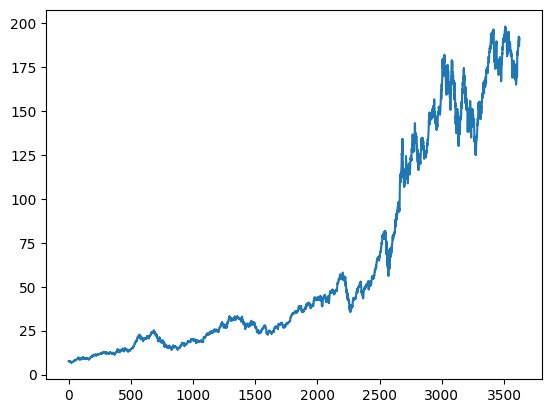

In [12]:
plt.plot(df.Close)

In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3621    179.674400
3622    179.717800
3623    179.775200
3624    179.858999
3625    179.960099
Name: Close, Length: 3626, dtype: float64

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3621    180.92385
3622    180.98280
3623    181.04290
3624    181.10540
3625    181.16455
Name: Close, Length: 3626, dtype: float64

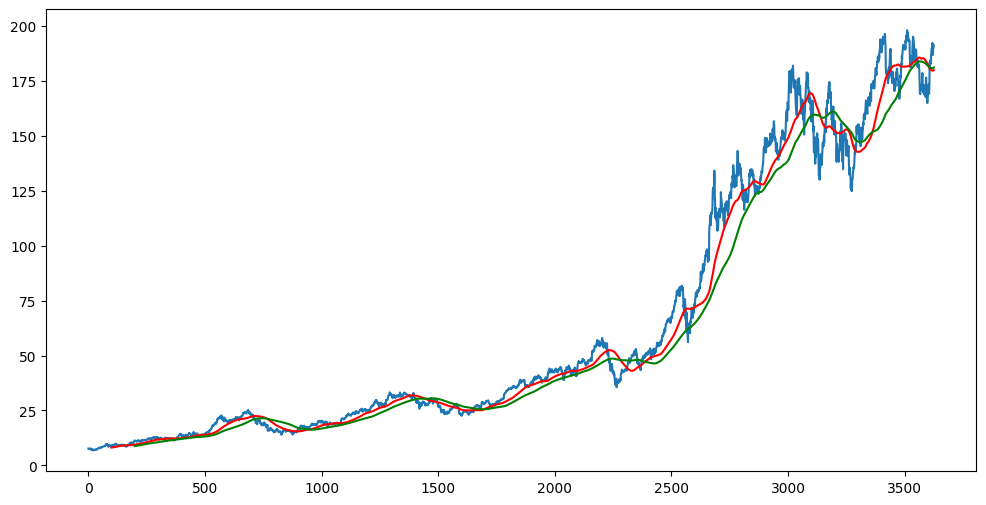

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
df.shape

(3626, 7)

In [17]:

#Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
df.shape

(3626, 7)

In [18]:
print(data_training.shape)
print(data_testing.shape)

(2538, 1)
(1088, 1)


In [20]:
data_training.head()


,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [21]:

data_testing.head()

,Close
2538,79.712502
2539,80.362503
2540,81.302498
2541,80.007500
2542,80.387497


In [22]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array = scalar.fit_transform(data_training)
data_training_array.shape

(2538, 1)

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
#ML Model

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.add(Dense(units = 1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 0.0471
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0047
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0034
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0033
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 0.0029
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0032
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0026
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0031
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0029
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.0024
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0022
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 0.0025
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0020
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0026
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - los

In [31]:
model.save('keras_model.h5')

In [32]:
data_testing.head()

,Close
2538,79.712502
2539,80.362503
2540,81.302498
2541,80.007500
2542,80.387497


In [33]:

data_training.tail(100)

,Close
2438,55.897499
2439,55.772499
2440,54.687500
2441,54.974998
2442,55.174999
...,...
2533,79.422501
2534,81.084999
2535,80.967499
2536,77.377502


In [37]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)



In [38]:
final_df.head()

,Close
0,55.897499
1,55.772499
2,54.687500
3,54.974998
4,55.174999


In [43]:
input_data = scalar.fit_transform(final_df)
input_data

array([[0.01028256],
       [0.00941263],
       [0.00186166],
       ...,
       [0.94348949],
       [0.94557723],
       [0.95253666]])

In [44]:
x_test = []
y_test = []

In [45]:
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [46]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)

(1088, 100, 1)


In [47]:
print(y_test.shape)

(1088,)


In [48]:

#Making preedictions

y_predicted = model.predict(x_test)
y_predicted.shape

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


(1088, 1)

In [49]:
y_test

array([0.17602132, 0.18054495, 0.18708678, ..., 0.94348949, 0.94557723,
       0.95253666])

In [50]:
y_predicted

array([[0.16548878],
       [0.16661926],
       [0.16754553],
       ...,
       [0.88149816],
       [0.88466007],
       [0.8866686 ]], dtype=float32)

In [52]:
scalar.scale_

array([0.00695943])

In [54]:
scale_factor = 1/0.00695943
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

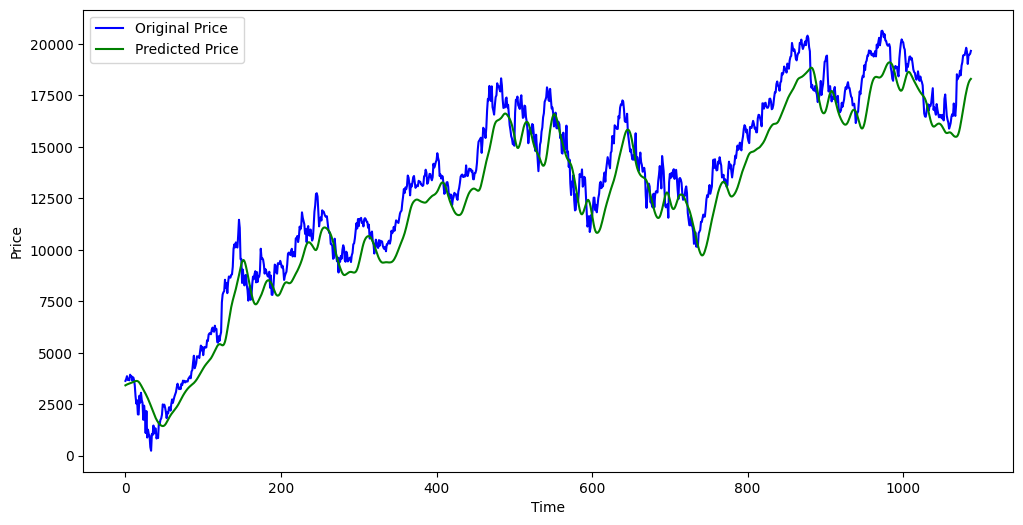

In [55]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'g', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()